<a href="https://colab.research.google.com/github/d04943016/ML_Concept/blob/main/CurveFitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras import regularizers
import matplotlib.pyplot as plt

In [2]:
model = Sequential()
model.add(Dense(5, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape = (1,)))
model.add(Dense(5, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(1))

model.compile(optimizer=Adam(),loss='mse')


In [3]:
# generate 10,000 random numbers in [-50, 50], along with their squares

# data number
data_number = 10000
x_min = - 5
x_max = 5

# x
x = np.random.random((10000,1)) * (x_max-x_min) + x_min

y_function = lambda x: np.sin(x)
y = y_function(x)

In [4]:
# fit the model, keeping 2,000 samples as validation set
hist = model.fit(x,y,validation_split=0.2,
                 epochs= 2000,
                 batch_size=256)

Epoch 1/2000
32/32 [==============================] - 1s 8ms/step - loss: 0.7052 - val_loss: 0.5413
Epoch 2/2000
32/32 [==============================] - 0s 8ms/step - loss: 0.5231 - val_loss: 0.5135
Epoch 3/2000
32/32 [==============================] - 0s 4ms/step - loss: 0.4954 - val_loss: 0.4842
Epoch 4/2000
32/32 [==============================] - 0s 4ms/step - loss: 0.4714 - val_loss: 0.4598
Epoch 5/2000
32/32 [==============================] - 0s 4ms/step - loss: 0.4500 - val_loss: 0.4381
Epoch 6/2000
32/32 [==============================] - 0s 5ms/step - loss: 0.4304 - val_loss: 0.4181
Epoch 7/2000
32/32 [==============================] - 0s 5ms/step - loss: 0.4122 - val_loss: 0.3987
Epoch 8/2000
32/32 [==============================] - 0s 6ms/step - loss: 0.3944 - val_loss: 0.3815
Epoch 9/2000
32/32 [==============================] - 0s 4ms/step - loss: 0.3769 - val_loss: 0.3628
Epoch 10/2000
32/32 [==============================] - 0s 4ms/step - loss: 0.3598 - val_loss: 0.3458

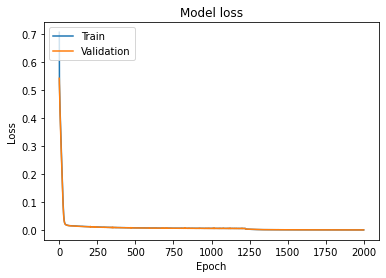

In [7]:
# plot history
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

#plt.yscale('log')

4/4 [==============================] - 0s 3ms/step


Text(0.5, 1.0, 'error')

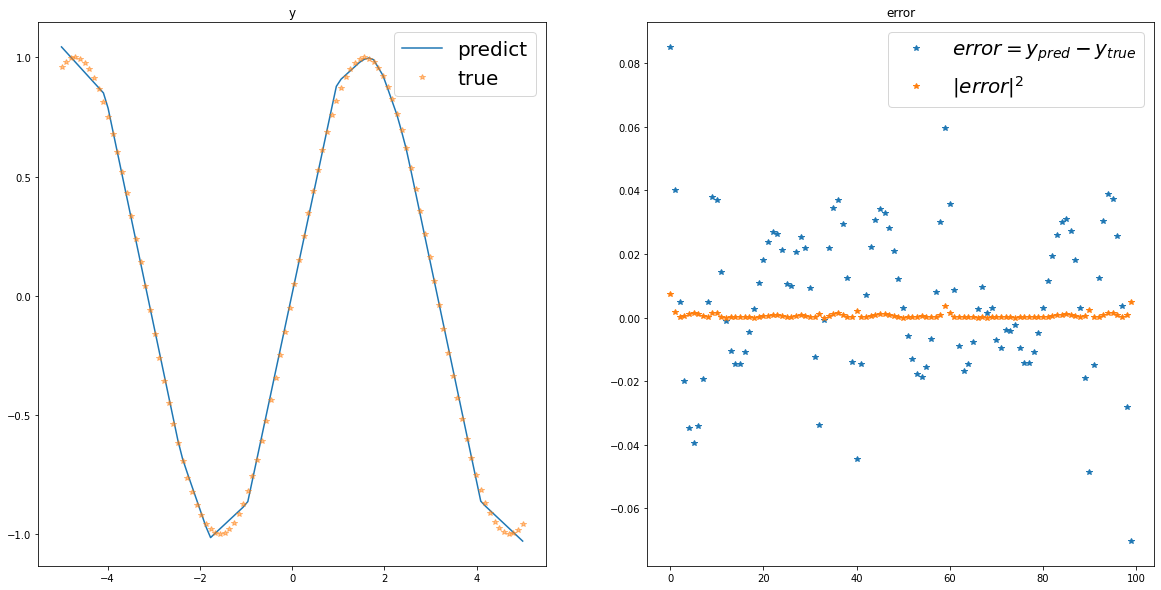

In [6]:
# plot setting
plot_x_min  = -5
plot_x_max  = 5
plot_points = 100

x = np.linspace(plot_x_min, plot_x_max, plot_points)
y_true = y_function( x )
y_pred = model.predict(x).ravel()


fig, ax = plt.subplots(1,2, figsize=(20,10))

# plot ground truth and prediction
plt.subplot(1,2,1)
l1 = plt.plot(x, y_pred, label = 'predict')
l2 = plt.plot(x, y_true, '*', alpha=0.5, label = 'true')
plt.legend(fontsize=20)
plt.title('y')

# plot error
plt.subplot(1,2,2)
error = y_pred-y_true
l3 = plt.plot( error, '*', label='$error = y_{pred}-y_{true}$' )
l4 = plt.plot( error**2, '*', label='$|error|^2$')
plt.legend(fontsize=20)
plt.title('error')